## Index

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Reading data from MongoDB

In [4]:
client = MongoClient("mongodb://localhost:27017")

In [5]:
# using the find method without a filter to read all records

results = client['DAP_Project_DB']['greenhouse_gas_emission'].find()

df1 = pd.DataFrame(results)

df1 = df1.iloc[:, 1:] # removing the 1st column

In [6]:
df1.head()

,gross,net,conventional_accounting,economic_sector,sector,category,sub_category_1,sub_category_2,sub_category_3,year,gas,mt_co2e_ar5_20_yr,mt_co2e_ar4_100_yr
0,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1990,CH4,4811,1432
1,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1990,CO2,521347,521347
2,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1990,N2O,2268,2560
3,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1991,CH4,5067,1508
4,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1991,CO2,550680,550680


## Basic EDA

In [7]:
print('The number of rows:', df1.shape[0])
print('The number of columns:', df1.shape[1])

The number of rows: 13981
The number of columns: 13


In [8]:
# columns and their datatypes

df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gross                    13981 non-null  object
 1   net                      13981 non-null  object
 2   conventional_accounting  13981 non-null  object
 3   economic_sector          13981 non-null  object
 4   sector                   13981 non-null  object
 5   category                 13981 non-null  object
 6   sub_category_1           13981 non-null  object
 7   sub_category_2           13981 non-null  object
 8   sub_category_3           13981 non-null  object
 9   year                     13981 non-null  object
 10  gas                      13981 non-null  object
 11  mt_co2e_ar5_20_yr        13981 non-null  object
 12  mt_co2e_ar4_100_yr       13981 non-null  object
dtypes: object(13)
memory usage: 1.4+ MB


- From the above observations of records, the below features are numerical datatype but are in datatype object
    - 'year', 
    - 'mt_co2e_ar5_20_yr', 
    - 'mt_co2e_ar4_100_yr' 
- We'll convert them in numerical datatype.

In [9]:
df1['year'] = df1['year'].astype(int) # integer for year

df1['mt_co2e_ar5_20_yr'] = df1['mt_co2e_ar5_20_yr'].astype(float)

df1['mt_co2e_ar4_100_yr'] = df1['mt_co2e_ar4_100_yr'].astype(float)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gross                    13981 non-null  object 
 1   net                      13981 non-null  object 
 2   conventional_accounting  13981 non-null  object 
 3   economic_sector          13981 non-null  object 
 4   sector                   13981 non-null  object 
 5   category                 13981 non-null  object 
 6   sub_category_1           13981 non-null  object 
 7   sub_category_2           13981 non-null  object 
 8   sub_category_3           13981 non-null  object 
 9   year                     13981 non-null  int32  
 10  gas                      13981 non-null  object 
 11  mt_co2e_ar5_20_yr        13981 non-null  float64
 12  mt_co2e_ar4_100_yr       13981 non-null  float64
dtypes: float64(2), int32(1), object(10)
memory usage: 1.3+ MB


In [11]:
# statistical info of the numerical features

df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gross,13981,2,Yes,12710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
net,13981,2,Yes,12586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conventional_accounting,13981,2,No,7378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic_sector,13981,8,Industry,3937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,13981,4,Energy,11935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,13981,17,Imported Fossil Fuels,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_category_1,13981,39,Transportation,4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_category_2,13981,43,Not Applicable,8711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_category_3,13981,23,Not Applicable,2170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,13981.0,NaN,NaN,NaN,2005.0,8.944592,1990.0,1997.0,2005.0,2013.0,2020.0


In [12]:
# checking for null values

df1.isna().sum()

gross                      0
net                        0
conventional_accounting    0
economic_sector            0
sector                     0
category                   0
sub_category_1             0
sub_category_2             0
sub_category_3             0
year                       0
gas                        0
mt_co2e_ar5_20_yr          0
mt_co2e_ar4_100_yr         0
dtype: int64

### Renaming the columns mt_co2e_ar5_20_yr and mt_co2e_ar4_100_yr

In [110]:
# Renaming the columns
df1.rename(columns={
    'mt_co2e_ar5_20_yr': 'CO2e_AR5_20yr',
    'mt_co2e_ar4_100_yr': 'CO2e_AR4_100yr'
}, inplace=True)

df1.head()

,gross,net,conventional_accounting,economic_sector,sector,category,sub_category_1,sub_category_2,sub_category_3,year,gas,CO2e_AR5_20yr,CO2e_AR4_100yr
0,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1990,CH4,4811.0,1432.0
1,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1990,CO2,521347.0,521347.0
2,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1990,N2O,2268.0,2560.0
3,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1991,CH4,5067.0,1508.0
4,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,1991,CO2,550680.0,550680.0


### Replacing 'biogenic_CO2' with 'Biogenic CO2' in the 'gas' column

In [14]:
# Displaying unique values in the 'gas' column
unique_gas_values = df1['gas'].unique()
print("Unique values in the 'gas' column:")
print(unique_gas_values)

Unique values in the 'gas' column:
['CH4' 'CO2' 'N2O' 'Biogenic CO2' 'PFCs' 'SF6' 'biogenic CO2' 'HFCs' 'NF3']


* In the above output we can see Biogenic CO2 and biogenic CO2 are identical, so capital B is substituted for small b

In [15]:
# Replacing 'biogenic_CO2' with 'Biogenic CO2' in the 'gas' column
df1['gas'] = df1['gas'].replace('biogenic CO2', 'Biogenic CO2')

# Displaying the updated unique values in the 'gas' column to verify the change
unique_gas_values = df1['gas'].unique()
print("Updated unique values in the 'gas' column:")
print(unique_gas_values)


Updated unique values in the 'gas' column:
['CH4' 'CO2' 'N2O' 'Biogenic CO2' 'PFCs' 'SF6' 'HFCs' 'NF3']


### Differentiating Categorical & Numerical Features

In [16]:
cat_cols = list(df1.select_dtypes(include = 'object'))

print("Categorical Features:", len(cat_cols))
cat_cols

Categorical Features: 10


['gross',
 'net',
 'conventional_accounting',
 'economic_sector',
 'sector',
 'category',
 'sub_category_1',
 'sub_category_2',
 'sub_category_3',
 'gas']

In [17]:
num_cols = list(df1.select_dtypes(exclude = 'object'))

print("Numerical Features:", len(num_cols))
num_cols

Numerical Features: 3


['year', 'CO2e_AR5_20yr', 'CO2e_AR4_100yr']

*  There are 10 Categorical & 3 Numerical Features in our dataset.

### Categorical Variables

In [18]:
df1[cat_cols]

,gross,net,conventional_accounting,economic_sector,sector,category,sub_category_1,sub_category_2,sub_category_3,gas
0,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,CH4
1,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,CO2
2,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,N2O
3,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,CH4
4,Yes,Yes,Yes,Buildings,Energy,Fuel Combustion,Commercial,Not Applicable,Coal,CO2
...,...,...,...,...,...,...,...,...,...,...
13976,Yes,Yes,Yes,Buildings,IPPU,Product Use,ODS Substitutes,Industrial,Not Applicable,HFCs
13977,Yes,Yes,Yes,Buildings,IPPU,Product Use,ODS Substitutes,Industrial,Not Applicable,HFCs
13978,Yes,Yes,Yes,Buildings,IPPU,Product Use,ODS Substitutes,Industrial,Not Applicable,HFCs
13979,Yes,Yes,Yes,Buildings,IPPU,Product Use,ODS Substitutes,Industrial,Not Applicable,HFCs


### Count of unique values in categorical columns

In [19]:
for col in cat_cols:
    frequency_table = df1[col].value_counts()
    print(f"Frequency table for {col}:\n{frequency_table}\n")

Frequency table for gross:
Yes    12710
No      1271
Name: gross, dtype: int64

Frequency table for net:
Yes    12586
No      1395
Name: net, dtype: int64

Frequency table for conventional_accounting:
No     7378
Yes    6603
Name: conventional_accounting, dtype: int64

Frequency table for economic_sector:
Industry          3937
Transportation    3689
Buildings         2387
Electricity       2046
Excluded           651
Net Emissions      620
Waste              465
Agriculture        186
Name: economic_sector, dtype: int64

Frequency table for sector:
Energy    11935
AFOLU       868
IPPU        713
Waste       465
Name: sector, dtype: int64

Frequency table for category:
Imported Fossil Fuels       5952
Fuel Combustion             5239
Land                         651
Other Fossil Fuel Use        372
Waste Combustion             248
Imported Electricity         248
Product Use                  248
Metals                       217
Electronics Industry         155
Wastewater               

### Uni-variate analysis

In [114]:
# make function for count plot for Categorical features

def Categorical_Plot(column,rotation,name):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        sns.countplot(x=df1[column], data=df1);
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=13)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(name)} - Count\n", fontsize = 25)
        
        plt.show()
        print()

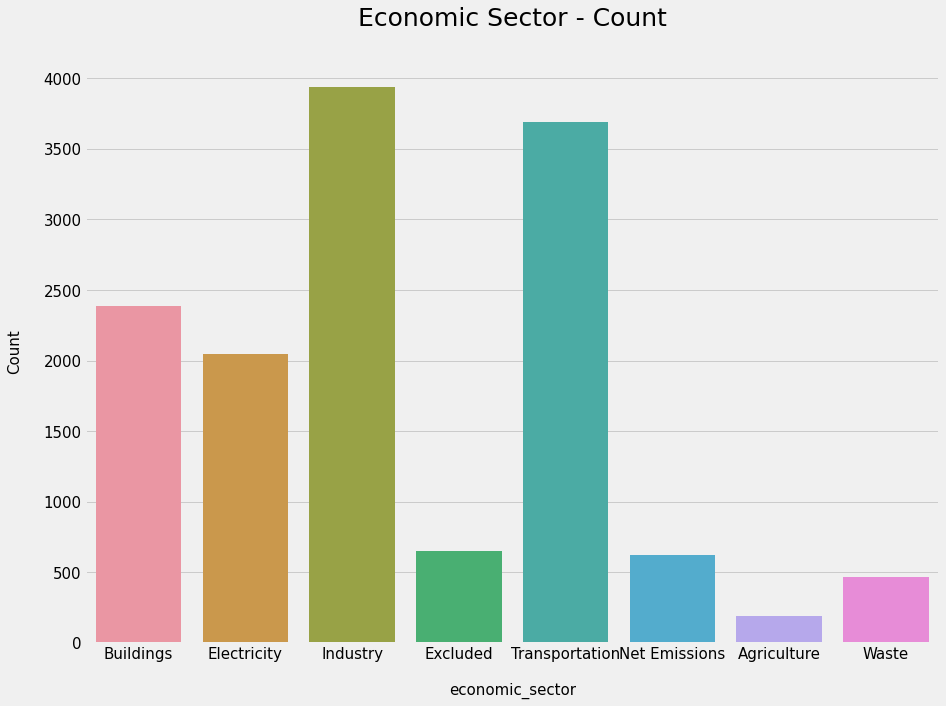

In [21]:
Categorical_Plot("economic_sector",rotation=0,name="Economic Sector")

In [111]:
Categorical_Plot("sector",rotation=0)

TypeError: Categorical_Plot() missing 1 required positional argument: 'name'

In [ ]:
Categorical_Plot("category",rotation=50)

In [23]:
Categorical_Plot("gas")

TypeError: Categorical_Plot() missing 2 required positional arguments: 'rotation' and 'name'

In [35]:
def Categorical_Plot2(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        sns.barplot(x = df1[column], y = df1.CO2e_AR5_20yr)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - CO2e_AR5_20yr\n", fontsize = 20)
        plt.ylabel("CO2e_AR5_20yr\n", fontsize=15)
        
        plt.subplot(1, 2, 2)
        sns.barplot(x = df1[column], y = df1.CO2e_AR4_100yr)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - CO2e_AR4_100yr\n", fontsize = 20)
        plt.ylabel("CO2e_AR4_100yr\n", fontsize=15)

        
        plt.show()
        print()

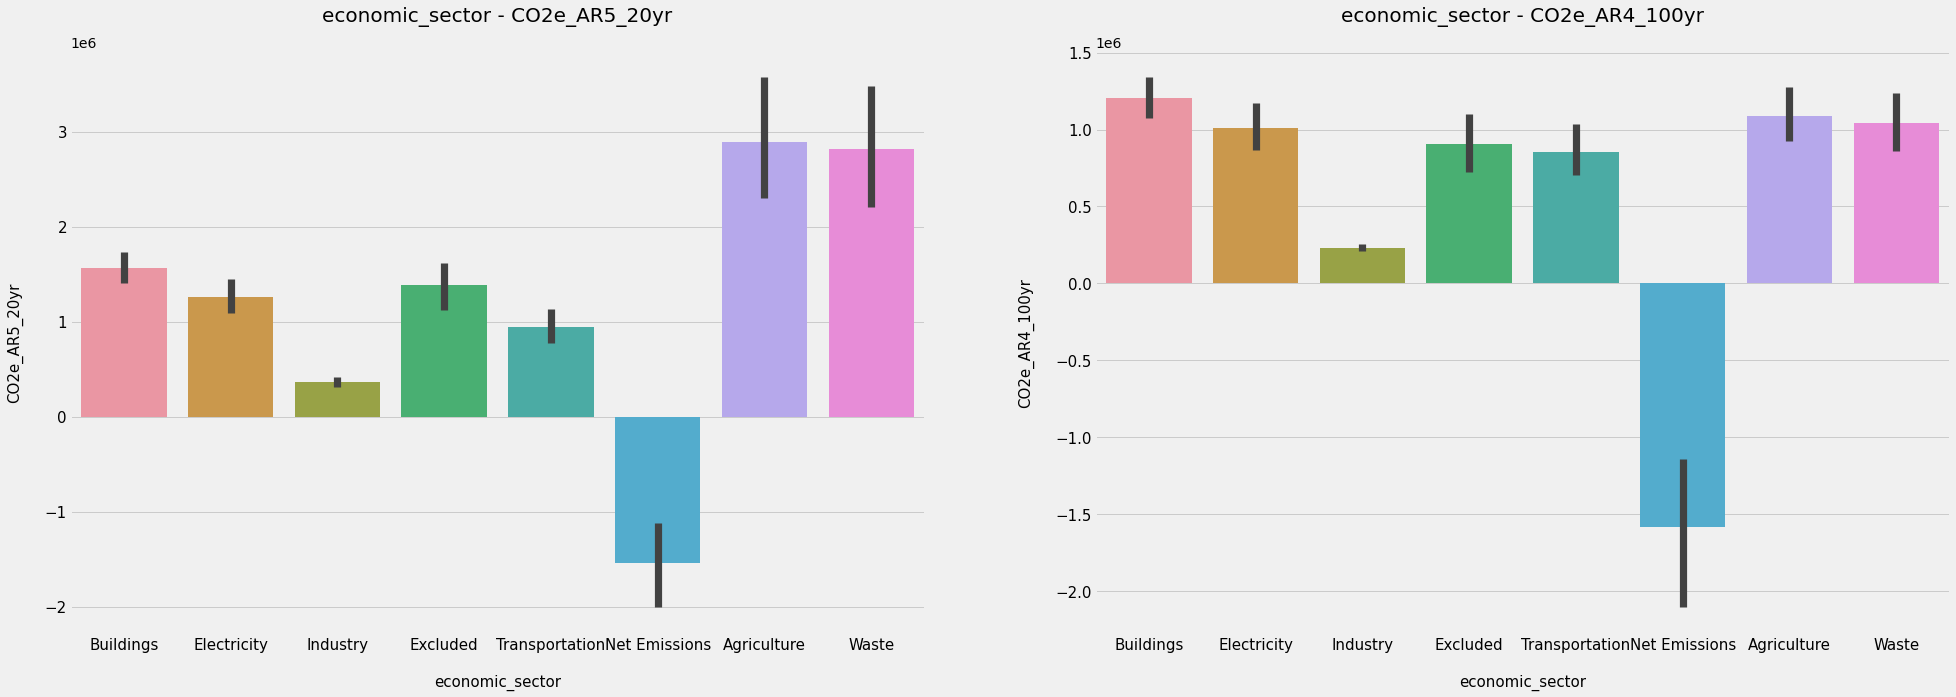

In [36]:
Categorical_Plot2("economic_sector")

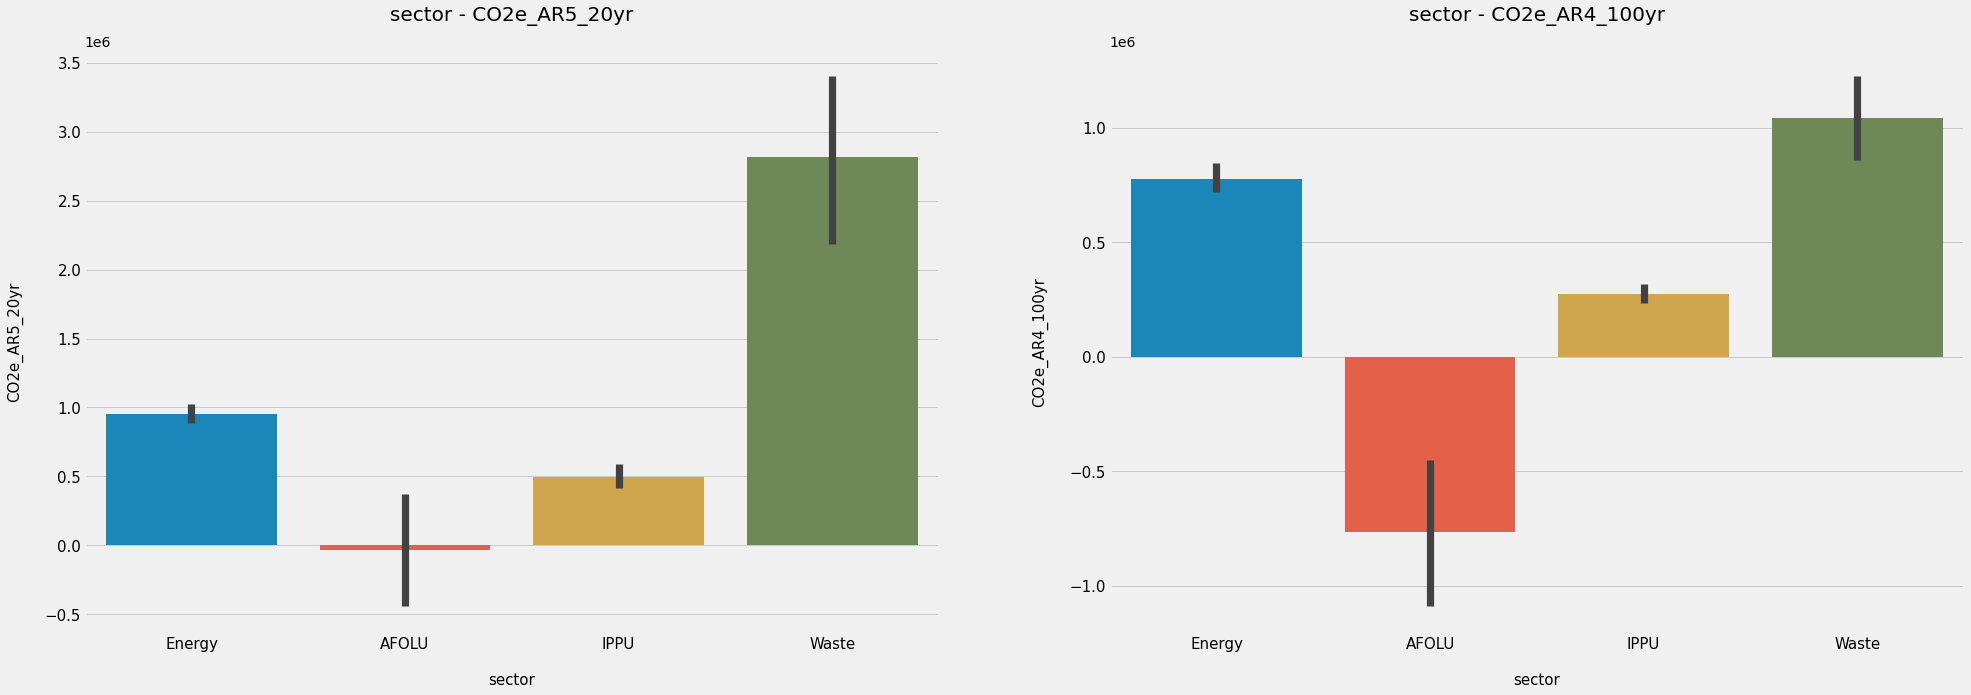

In [37]:
Categorical_Plot2("sector")

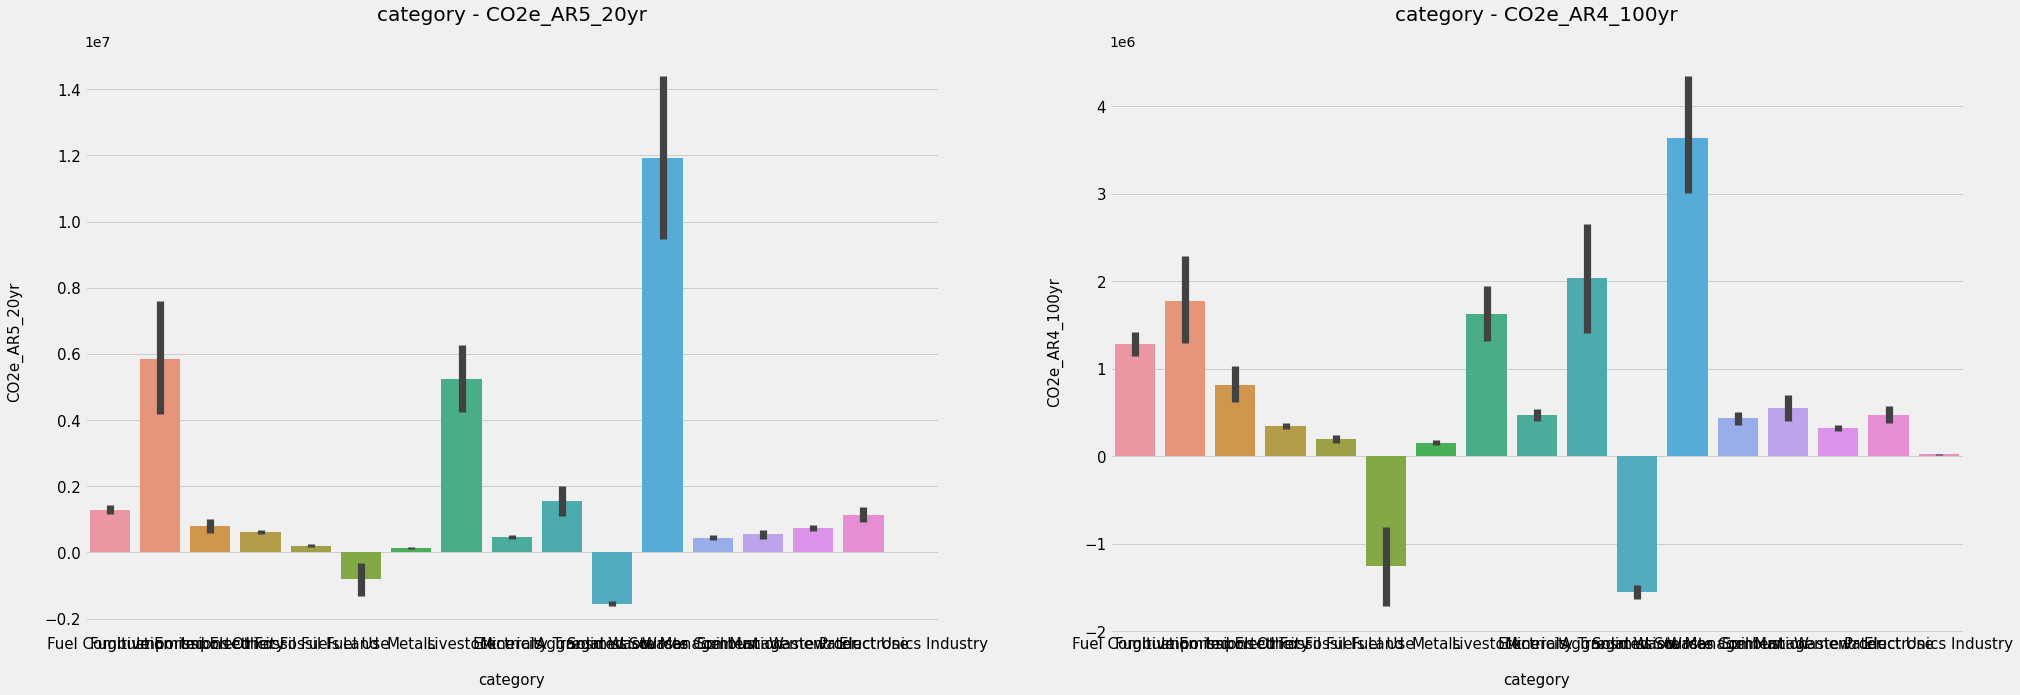

In [38]:
Categorical_Plot2("category")

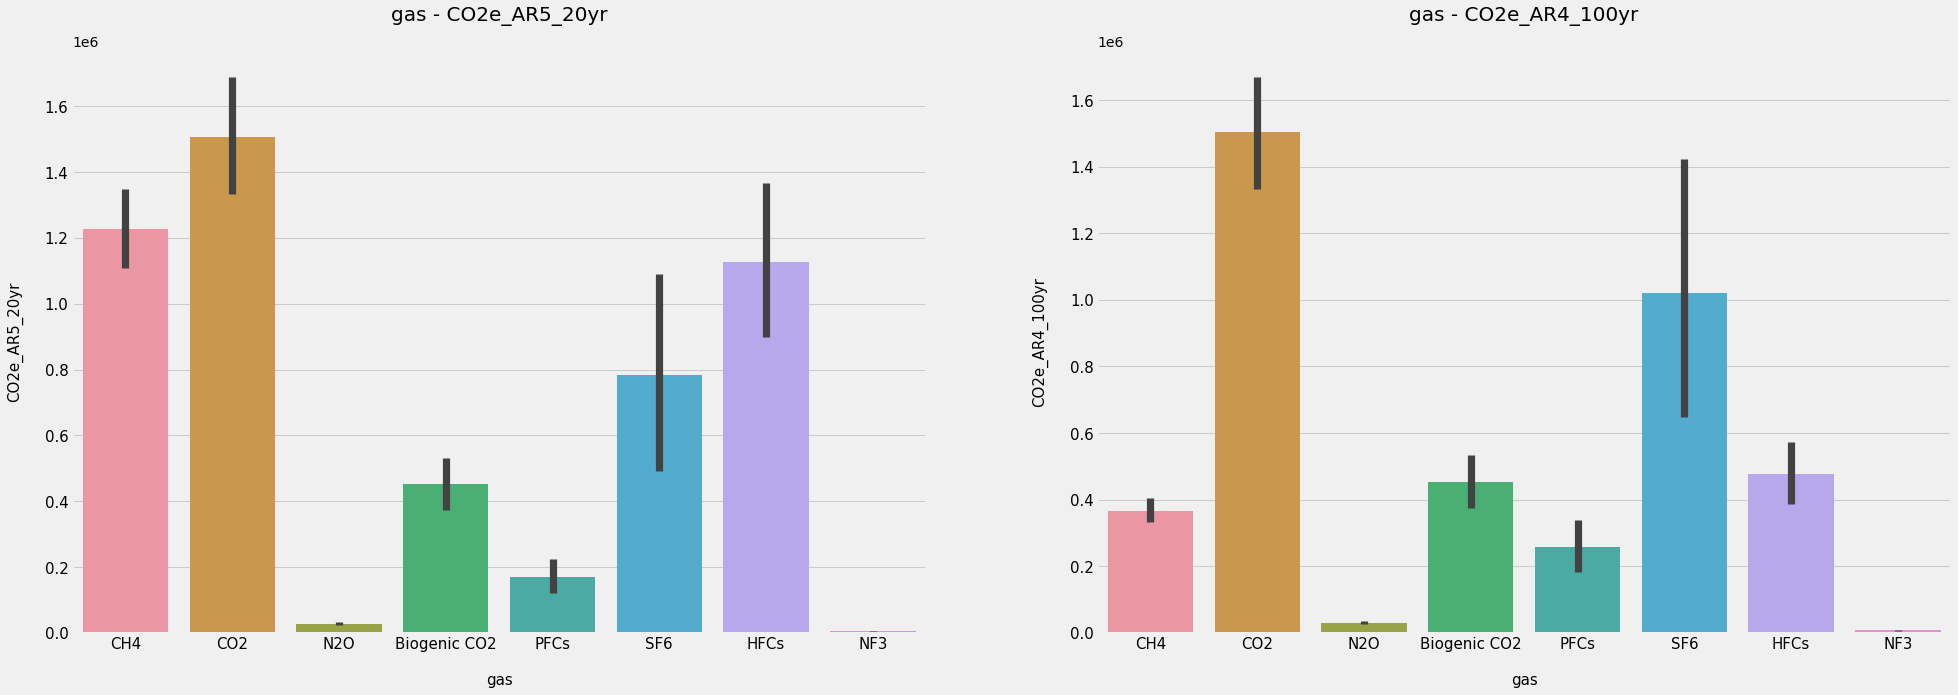

In [39]:
Categorical_Plot2("gas")

In [27]:
# make function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):
    
       
        
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(df1[column],color='skyblue')
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)


        plt.show()
        print()

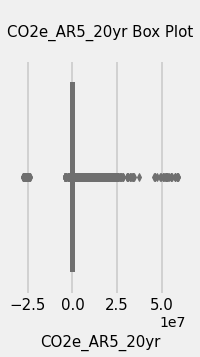

In [40]:
Numerical_Plot("CO2e_AR5_20yr")

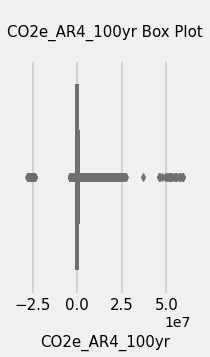

In [41]:
Numerical_Plot("CO2e_AR4_100yr")

### Bi-variate analysis

In [42]:
# Creating a function to plot relation b/w discrete varibale vs sale price

def discrete_plot(df1, discrete_col, mapping_key):
    try:
        plt.figure(figsize=(20, 5))
        
        plt.subplot(1, 2, 1) 
        df.groupby(discrete_col)['CO2e_AR5_20yr'].sum().plot()        # line plot
        plt.title(f"{discrete_col} vs CO2e_AR5_20yr", fontsize = 14)
        plt.xticks(horizontalalignment="center", fontsize=14) #, rotation = 90)
        plt.yticks(fontsize = 14)
        plt.xlabel(f"{discrete_col}", fontsize=14)
        plt.ylabel("sum CO2e_AR5_20yr", fontsize=14)
        

        plt.subplot(1, 2, 2) 
        df.groupby(discrete_col)['CO2e_AR4_100yr'].sum().plot()        # line plot
        plt.title(f"{discrete_col} vs CO2e_AR4_100yr", fontsize = 14)
        plt.xticks(horizontalalignment="center", fontsize=14) #, rotation = 90)
        plt.yticks(fontsize = 14)
        plt.xlabel(f"{discrete_col}", fontsize=14)
        plt.ylabel("Median CO2e_AR4_100yr", fontsize=14)
      

        plt.show()
        print()
    except:
        print()

In [44]:
discrete_plot(df1,year, None)

NameError: name 'year' is not defined

## Top 10 Gas emission by Sectors


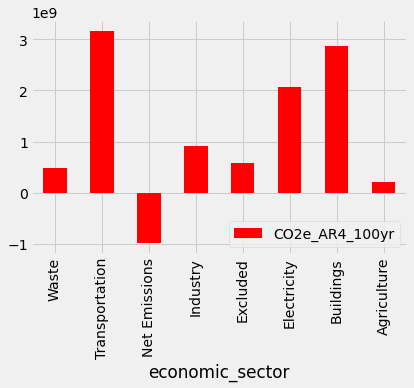

In [45]:
df1[['CO2e_AR4_100yr','economic_sector']].groupby(["economic_sector"]).sum().sort_values(by='economic_sector',ascending=False).head(10).plot.bar(color='r')
plt.show()

### Cumulative CO2 Emisiion since 1990

<AxesSubplot:xlabel='year', ylabel='CO2e_AR5_20yr'>

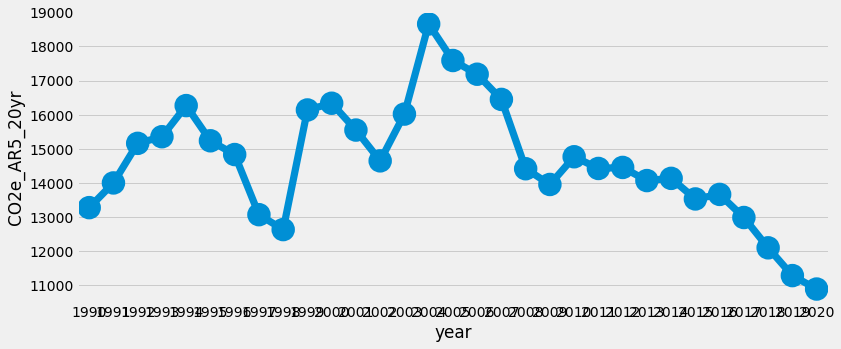

In [47]:
df4 = df1[['CO2e_AR5_20yr','year','economic_sector']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(12,5))
sns.pointplot(x='year', y='CO2e_AR5_20yr', data=df4)

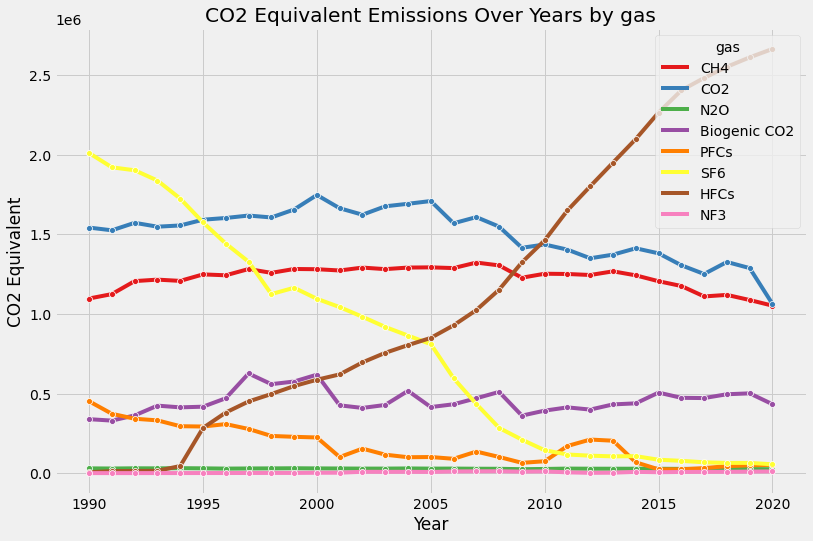

In [49]:


# Visualization - Line plot for CO2e_AR5_20yr and CO2e_AR4_100yr grouped by Year and Economic Sector
plt.figure(figsize=(12, 8))

sns.lineplot(data=df1, x='year', y='CO2e_AR5_20yr', hue='gas', marker='o', palette='Set1', ci=None)
#sns.lineplot(data=df1, x='year', y='mt_co2e_ar4_100_yr', hue='gas', marker='o', palette='Set2', ci=None)

plt.xlabel('Year')
plt.ylabel('CO2 Equivalent')
plt.title('CO2 Equivalent Emissions Over Years by gas')
plt.legend(title='gas')
plt.grid(True)
plt.show()


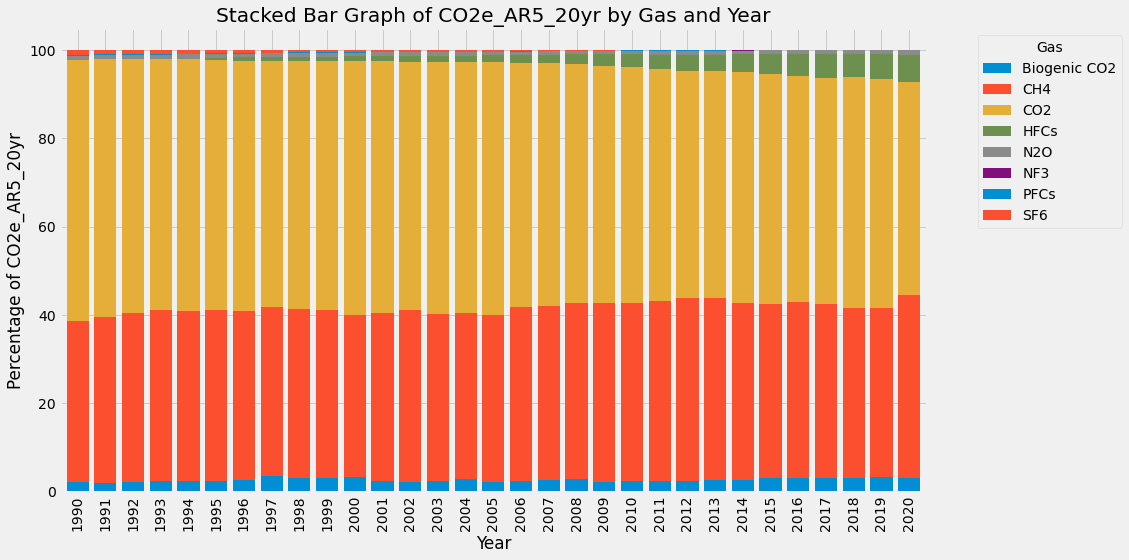

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the columns 'Year', 'CO2e_AR5_20yr', and 'gas'

# Grouping by 'Year' and 'gas', calculating the sum of 'CO2e_AR5_20yr'
grouped = df1.groupby(['year', 'gas'])['CO2e_AR5_20yr'].sum().reset_index()

# Calculating the total sum of 'CO2e_AR5_20yr' for each year
yearly_totals = grouped.groupby('year')['CO2e_AR5_20yr'].transform('sum')

# Calculating the percentages
grouped['Percentage'] = (grouped['CO2e_AR5_20yr'] / yearly_totals) * 100

# Creating a pivot table to prepare data for the stacked bar plot
pivot_table = grouped.pivot(index='year', columns='gas', values='Percentage').fillna(0)

# Creating the stacked bar plot
pivot_table.plot(kind='bar', stacked=True, width=0.8, figsize=(16, 8))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of CO2e_AR5_20yr')
plt.title('Stacked Bar Graph of CO2e_AR5_20yr by Gas and Year')

# Displaying the plot
plt.legend(title='Gas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [112]:
# Grouping by 'Year' and 'Gas' columns to sum up emissions
grouped = df1.groupby(['year', 'gas']).sum().reset_index()

# Pivot the table to get gases as columns
pivot_df = grouped.pivot(index='year', columns='gas', values='CO2e_AR5_20yr').reset_index()

# Filling NaN values with 0
pivot_df = pivot_df.fillna(0)

pivot_df


gas,year,Biogenic CO2,CH4,CO2,HFCs,N2O,NF3,PFCs,SF6
0,1990,8476043.0,145904852.0,235992511.0,44852.0,3832472.0,489.0,903252.0,4020918.0
1,1991,8254588.0,149590479.0,233377991.0,106272.0,3717685.0,489.0,745520.0,3841777.0
2,1992,9069662.0,160442869.0,240588839.0,111654.0,3881727.0,489.0,683880.0,3804773.0
3,1993,10603045.0,161669138.0,236855349.0,118145.0,3839465.0,611.0,663174.0,3675627.0
4,1994,10333236.0,160620578.0,238042184.0,360043.0,3990241.0,672.0,589943.0,3449014.0
5,1995,10437974.0,166041135.0,243566563.0,2272977.0,3859211.0,849.0,585853.0,3150445.0
6,1996,11765634.0,165297220.0,245227528.0,3047793.0,3640648.0,943.0,616465.0,2883949.0
7,1997,15650173.0,170506873.0,247559362.0,3602141.0,3750693.0,1225.0,555183.0,2656253.0
8,1998,13976095.0,167333510.0,245732548.0,3976986.0,3821769.0,1503.0,467673.0,2249893.0
9,1999,14390929.0,170562163.0,253370545.0,4376732.0,3924890.0,1525.0,456705.0,2328968.0


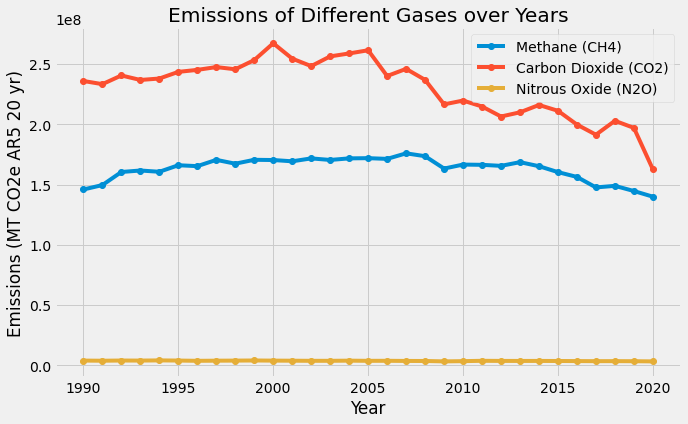

In [76]:
# Plotting the emissions of different gases over the years
plt.figure(figsize=(10, 6))

plt.plot(pivot_df['year'], pivot_df['CH4'], marker='o', label='Methane (CH4)')
plt.plot(pivot_df['year'], pivot_df['CO2'], marker='o', label='Carbon Dioxide (CO2)')
plt.plot(pivot_df['year'], pivot_df['N2O'], marker='o', label='Nitrous Oxide (N2O)')

plt.title('Emissions of Different Gases over Years')
plt.xlabel('Year')
plt.ylabel('Emissions (MT CO2e AR5 20 yr)')
plt.legend()
plt.grid(True)
plt.show()


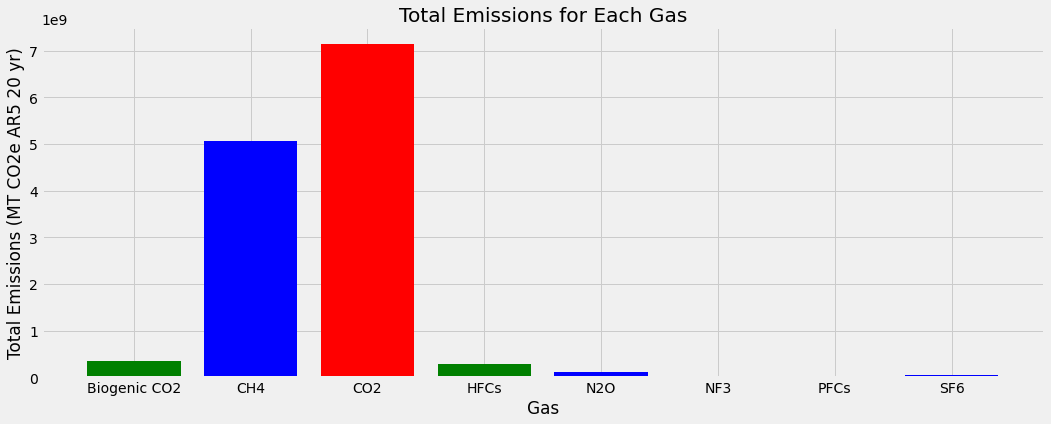

In [81]:
# Calculate total emissions for each gas across all years
total_emissions = df1.groupby('gas')['CO2e_AR5_20yr'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(16, 6))
plt.bar(total_emissions['gas'], total_emissions['CO2e_AR5_20yr'], color=['green', 'blue', 'red'])
plt.title('Total Emissions for Each Gas')
plt.xlabel('Gas')
plt.ylabel('Total Emissions (MT CO2e AR5 20 yr)')
plt.show()


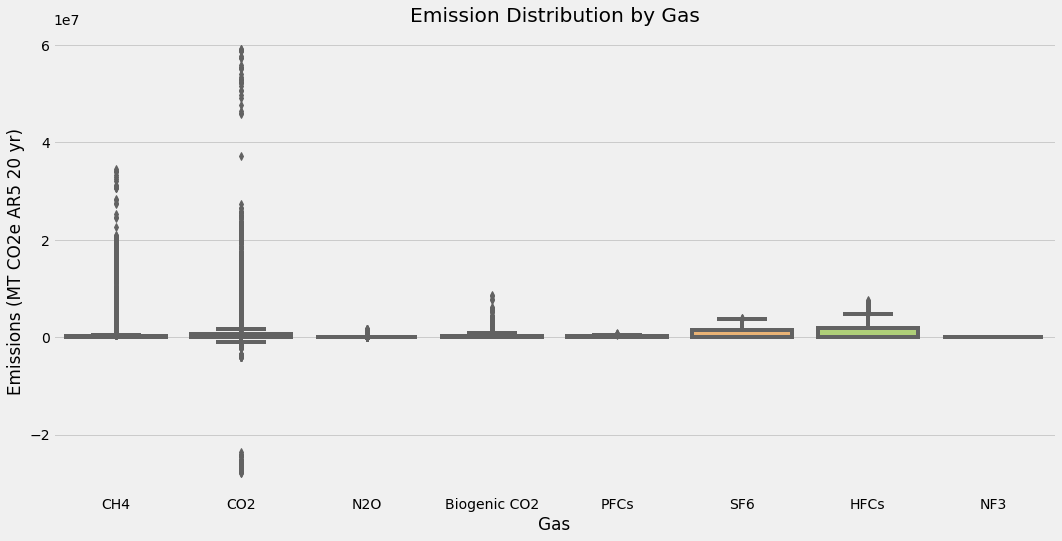

In [86]:
# Create a box plot to visualize the distribution of emissions for each gas
plt.figure(figsize=(16, 8))
sns.boxplot(x='gas', y='CO2e_AR5_20yr', data=df1, palette='Set3')
plt.title('Emission Distribution by Gas')
plt.xlabel('Gas')
plt.ylabel('Emissions (MT CO2e AR5 20 yr)')
plt.show()


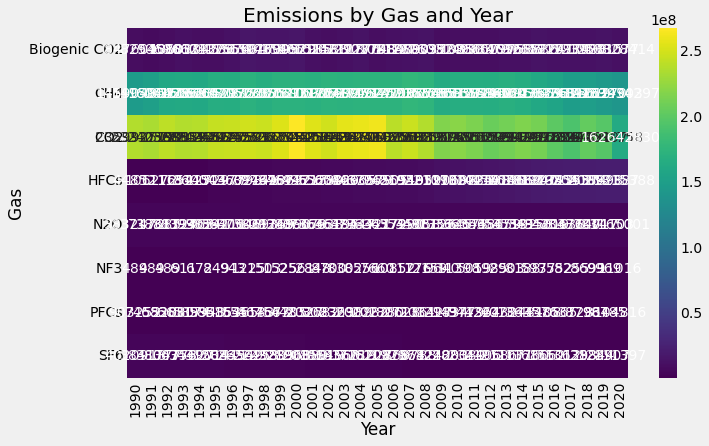

In [90]:
# Pivot the data to create a heatmap
heatmap_data = df1.pivot_table(index='gas', columns='year', values='CO2e_AR5_20yr', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Emissions by Gas and Year')
plt.xlabel('Year')
plt.ylabel('Gas')
plt.show()


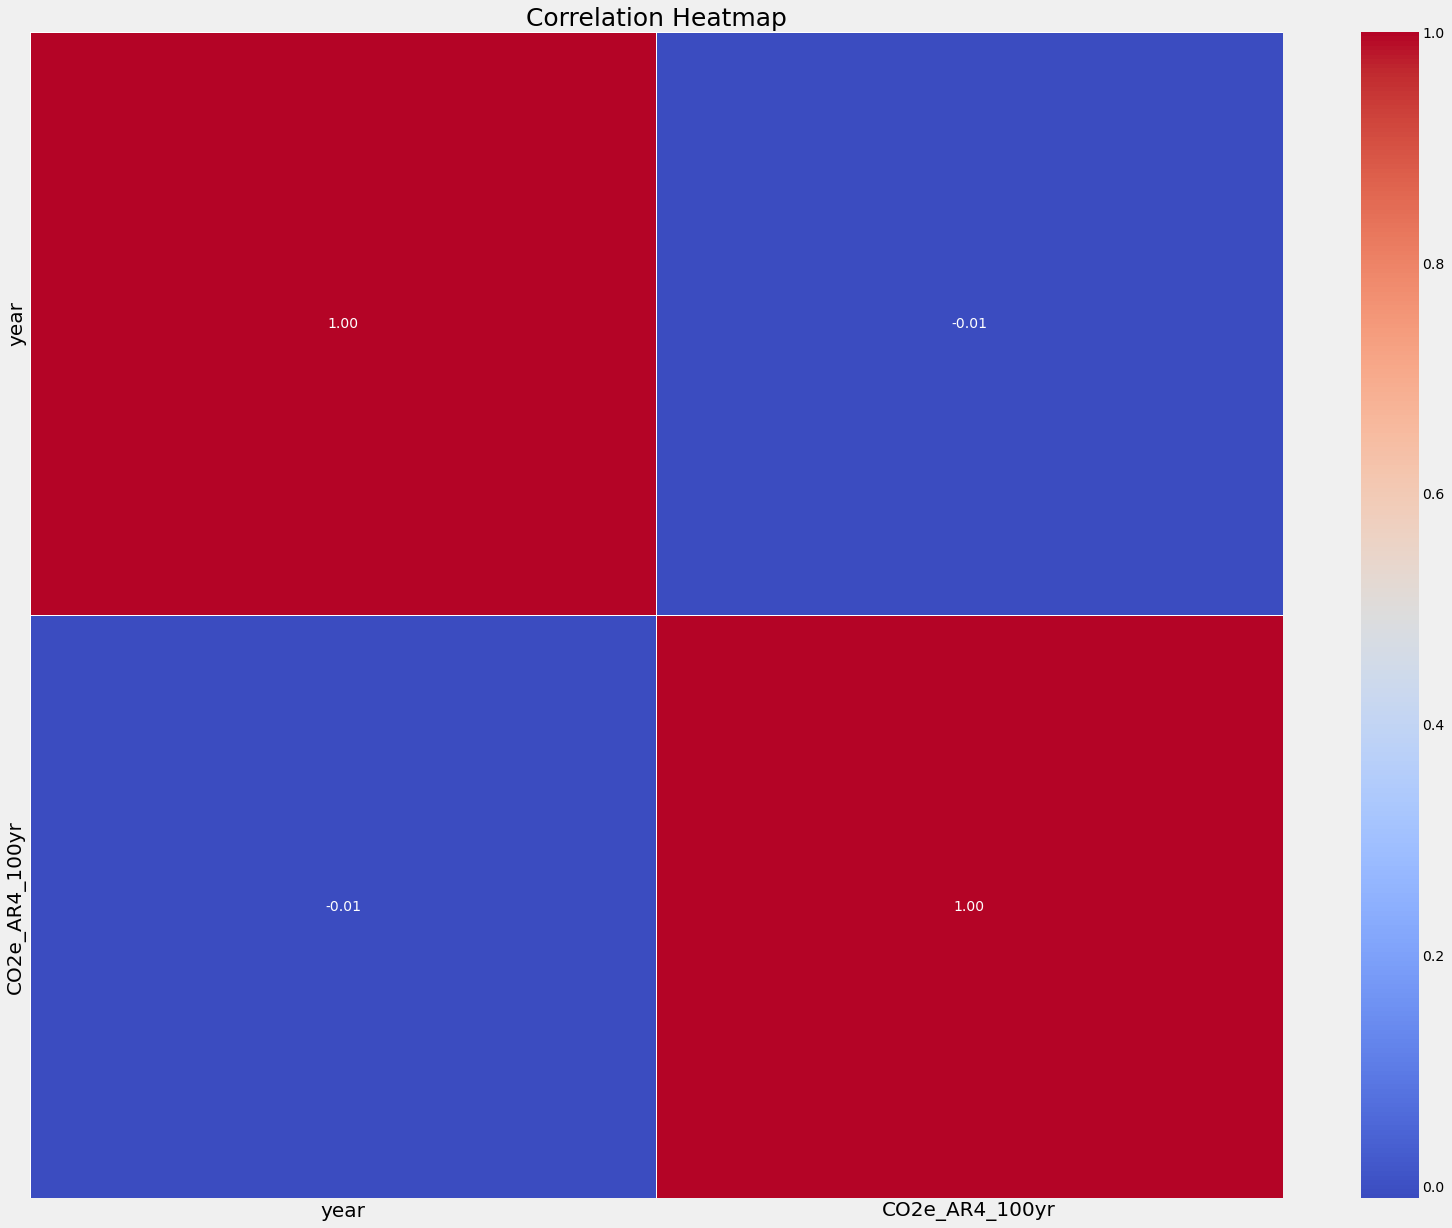

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))  
heatmap = sns.heatmap(df1.drop('CO2e_AR5_20yr', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)


heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=20)

plt.title('Correlation Heatmap', fontsize=25)
plt.show()

In [97]:
df1.corr()

,year,CO2e_AR5_20yr,CO2e_AR4_100yr
year,1.000000,-0.007760,-0.010514
CO2e_AR5_20yr,-0.007760,1.000000,0.930208
CO2e_AR4_100yr,-0.010514,0.930208,1.000000


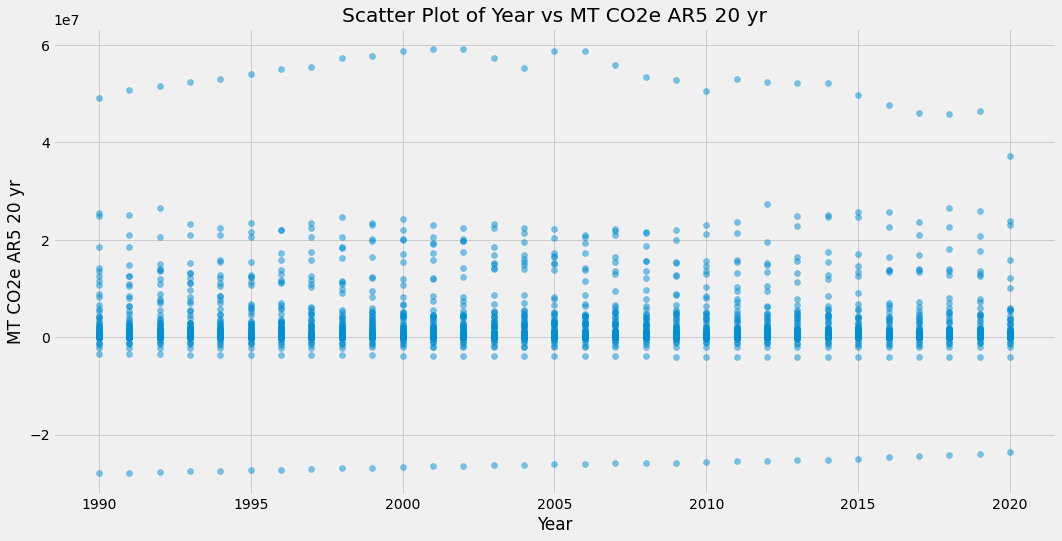

In [109]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
plt.figure(figsize=(16, 8))
plt.scatter(df3["year"], df3['CO2e_AR5_20yr'], alpha=0.5)
plt.title('Scatter Plot of Year vs MT CO2e AR5 20 yr')
plt.xlabel('Year')
plt.ylabel('MT CO2e AR5 20 yr')
plt.grid(True)
plt.show()


In [108]:
df3= df1[df1['gas'] == "CO2"]